In [ ]:
# Name: Suraj Yogesh Yeola
# Class: TY B BTech
# Branch: Computer Engineering
# Roll Number: 69
# Assignment 03 DSBDL

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Create the dataset
data = pd.DataFrame({
    'x': [4, 8, 13, 7],
    'y': [11, 4, 5, 14]
})

# Display the dataset
print("Original Data:")
print(data)


Original Data:
    x   y
0   4  11
1   8   4
2  13   5
3   7  14


In [ ]:
# Compute the mean of each variable (feature)
mean_x = np.mean(data['x'])
mean_y = np.mean(data['y'])

print(f"Mean of x: {mean_x}")
print(f"Mean of y: {mean_y}")


Mean of x: 8.0
Mean of y: 8.5


In [ ]:
# Center the data by subtracting the mean of each feature
data_centered = data - [mean_x, mean_y]

# Compute the covariance matrix
cov_matrix = np.cov(data_centered.T)  # Transpose to get covariance of variables
print(f"Covariance Matrix:\n{cov_matrix}")


Covariance Matrix:
[[ 14. -11.]
 [-11.  23.]]


In [ ]:
# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(f"Eigenvalues: {eigenvalues}")
print(f"Eigenvectors:\n{eigenvectors}")


Eigenvalues: [ 6.61513568 30.38486432]
Eigenvectors:
[[-0.83025082  0.55738997]
 [-0.55738997 -0.83025082]]


In [ ]:
# Normalize the eigenvectors (if necessary)
eigenvectors_normalized = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

print(f"Normalized Eigenvectors:\n{eigenvectors_normalized}")


Normalized Eigenvectors:
[[-0.83025082  0.55738997]
 [-0.55738997 -0.83025082]]


In [ ]:
# Select the eigenvector corresponding to the largest eigenvalue (first principal component)
principal_component = eigenvectors[:, np.argmax(eigenvalues)]

print(f"Principal Component (Eigenvector corresponding to largest eigenvalue):\n{principal_component}")

# Project the centered data onto the principal component
data_projected = data_centered.dot(principal_component)

# Display the projected data
print(f"Projected Data (1D):\n{data_projected}")


Principal Component (Eigenvector corresponding to largest eigenvalue):
[ 0.55738997 -0.83025082]
Projected Data (1D):
0   -4.305187
1    3.736129
2    5.692828
3   -5.123769
dtype: float64


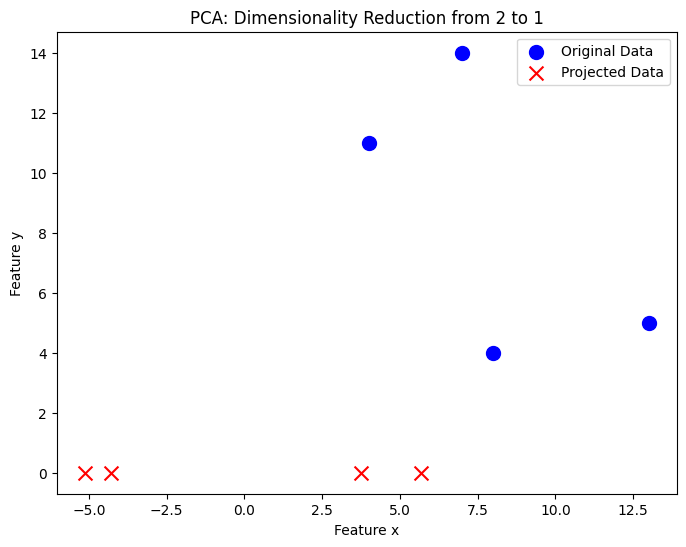

In [ ]:
# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Original Data', s=100)

# Plot the projected data onto the first principal component
plt.scatter(data_projected, np.zeros_like(data_projected), color='red', label='Projected Data', s=100, marker='x')

plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.title('PCA: Dimensionality Reduction from 2 to 1')
plt.legend()
plt.show()
